**Project title: (Heart Diseases. Exploratory Data Analysis – Personal Key Indicators of Heart Diseases )**


**Abstract**:

Cardiovascular disease is still at the center of major public health concerns all over the world. For this project, information is gathered relating to the potential causes of heart disease and the model determines possibilities of such an occurrence. With help of anying out influential predictors and background demographic data, the research can improve OSI and help to construct protective initiatives. The strategies arising from this analysis can help healthcare workers identify and treat higher risk patients as this analysis shows a way of minimizing the impact of heart diseases.

**Problem Statement**:
Cardiovascular disease is responsible for the death of hundreds of thousands of individuals across the globe annually, which is why discovery of precursors and the triggers of the disease is important. It is the aim of this analysis to work with the data set of heart disease to attain better diagnosis and prevention more so by use of data driven tools.

**Scope:**
This project aims to:

Analyze the heart disease dataset to identify significant predictors of heart disease.

Apply machine learning models to classify and predict the presence of heart disease.

Provide actionable insights for healthcare professionals to prioritize
 high-risk patients and recommend interventions.

**Business Questions**
1.	What factors (eg, obesity, smoking, alcohol drinking) most affect heart disease?

2.	Which category of heart disease is more common?

3.	What are the Impact Does any Physical Activity have on Heart Disease Risk?

4.	How the cases of heart deseases differ according to gender-wise

5.	Does the diabetics patients at higher risk of heart disease?

6.	What is the effect of Sleep time on the risk of heart disease?

7.	Which category of heart disease is more common?


**Data Set**

https://www.kaggle.com/code/georgyzubkov/heart-disease-exploratory-data-analysis/notebook

Visualization
The data visualization for the given dataset based on the multiple steps which are as follows;

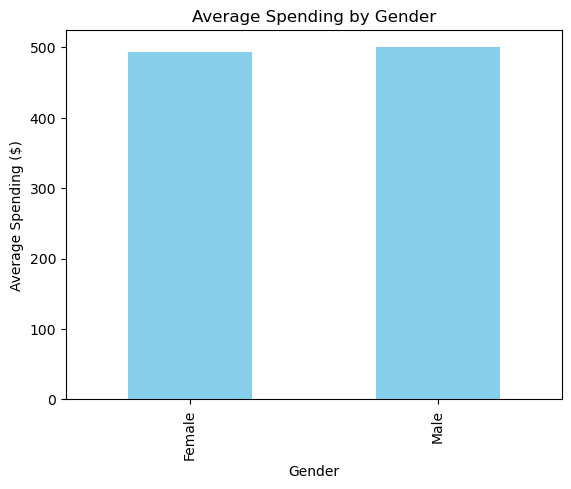

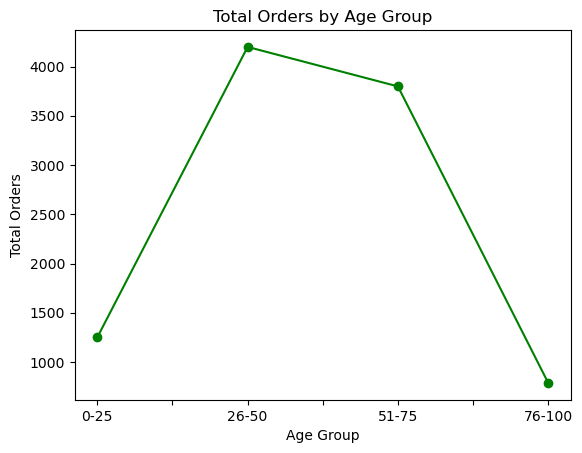

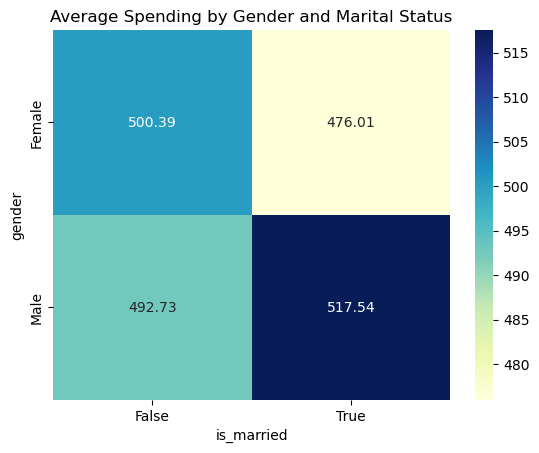

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://api.slingacademy.com/v1/sample-data/files/customers.csv"
data = pd.read_csv(url)

# Data cleaning
data = data.dropna()  # Remove missing values
data['gender'] = data['gender'].str.capitalize()

# Groupby: Analyze average spending by gender
grouped_gender = data.groupby('gender')['spent'].mean()

# Groupby: Total orders by age group
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])
grouped_age = data.groupby('age_group')['orders'].sum()

# Pivot: Average spent by gender and marital status
pivot_table = data.pivot_table(values='spent', index='gender', columns='is_married', aggfunc='mean')

# Visualizations
# Bar plot for average spending by gender
grouped_gender.plot(kind='bar', color='skyblue', title="Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending ($)")
plt.show()

# Line plot for total orders by age group
grouped_age.plot(kind='line', marker='o', color='green', title="Total Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Orders")
plt.show()

# Heatmap for pivot table (requires seaborn)
import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Spending by Gender and Marital Status")
plt.show()


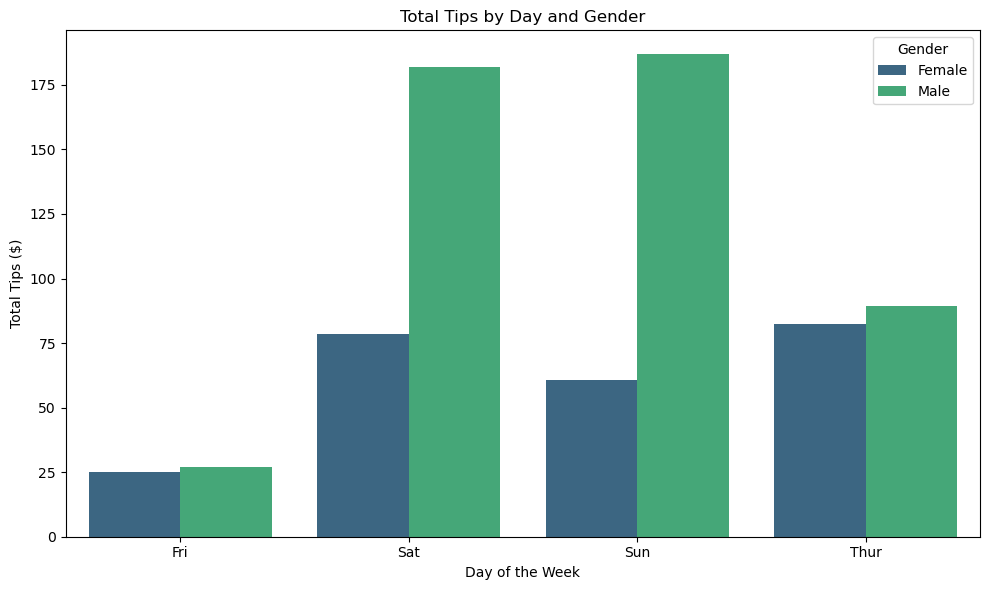

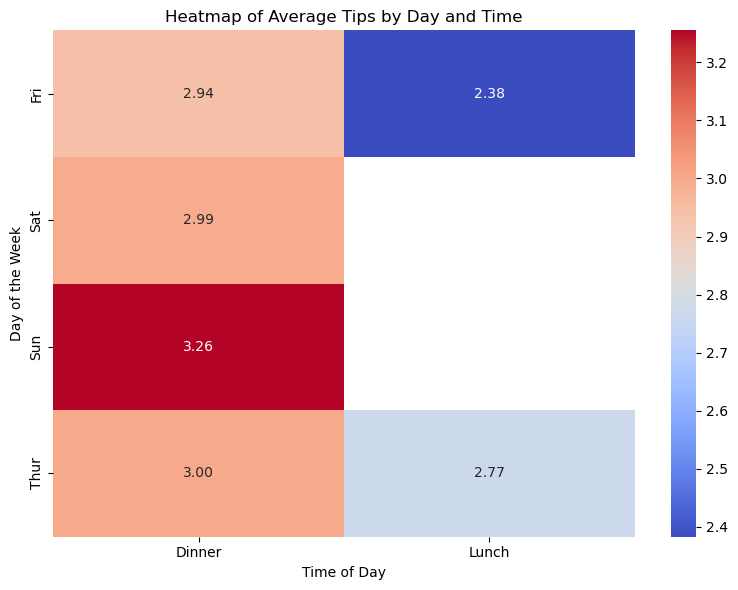

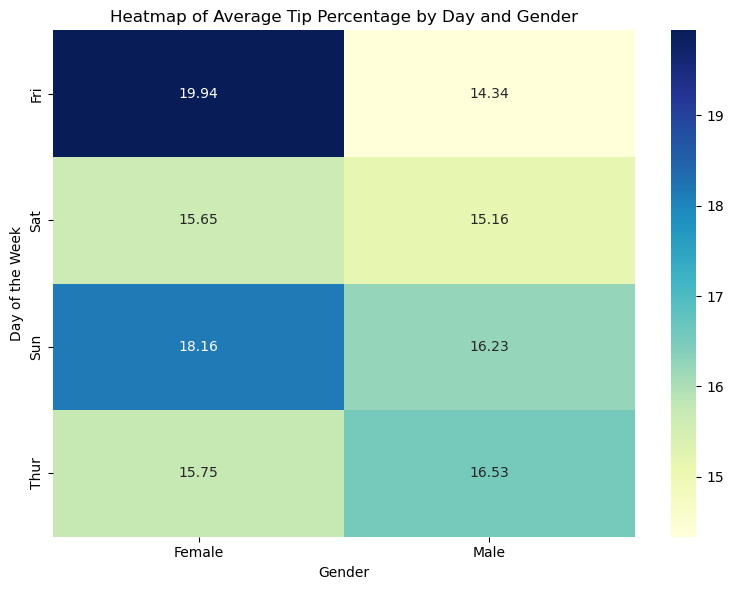

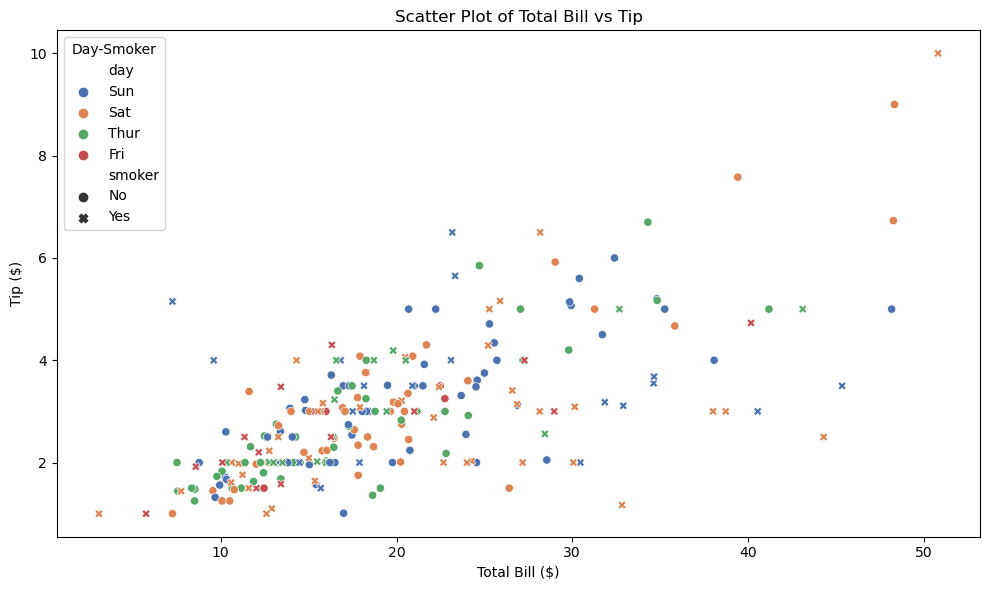

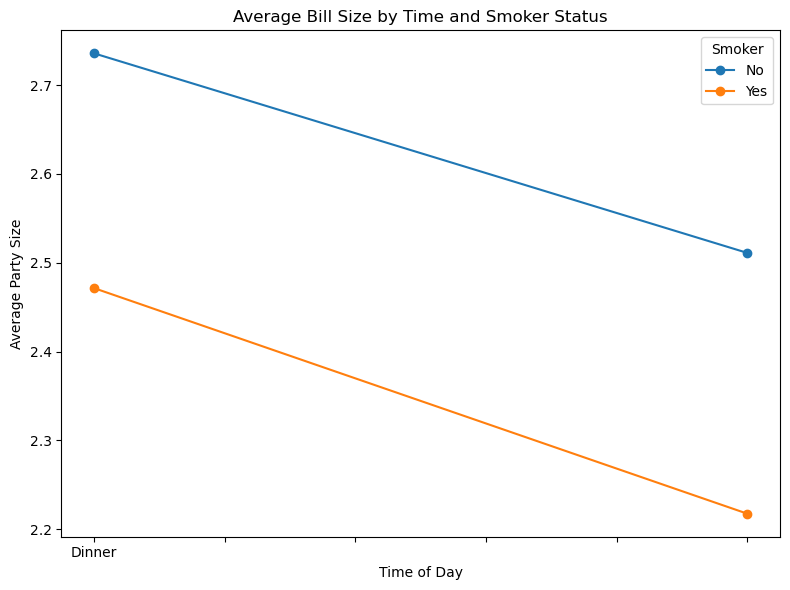

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"  # Tips dataset
data = pd.read_csv(url)

# Step 2: Data cleaning
data.columns = data.columns.str.strip()  # Strip whitespace from column names
data = data.dropna()  # Remove rows with missing values
data['tip_percent'] = (data['tip'] / data['total_bill']) * 100  # Add derived column: tip percentage

# Step 3: Groupby and Aggregation
# Aggregation: Total and average tips by day and gender
grouped = data.groupby(['day', 'sex']).agg(
    total_bill_sum=('total_bill', 'sum'),
    total_tip_sum=('tip', 'sum'),
    avg_tip=('tip', 'mean'),
    avg_tip_percent=('tip_percent', 'mean'),
    avg_size=('size', 'mean')
).reset_index()

# Aggregation: Average bill and tip percentage by smoker status
smoker_grouped = data.groupby('smoker').agg(
    avg_total_bill=('total_bill', 'mean'),
    avg_tip_percent=('tip_percent', 'mean')
).reset_index()

# Step 4: Pivot Tables
# Pivot 1: Average tip by day and time
pivot1 = data.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')

# Pivot 2: Average tip percentage by day and gender
pivot2 = data.pivot_table(values='tip_percent', index='day', columns='sex', aggfunc='mean')

# Pivot 3: Average bill size by time and smoker status
pivot3 = data.pivot_table(values='size', index='time', columns='smoker', aggfunc='mean')

# Step 5: Visualizations

# Bar Plot: Total tips by day and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='day', y='total_tip_sum', hue='sex', palette='viridis')
plt.title("Total Tips by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Total Tips ($)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Heatmap: Average tip by day and time
plt.figure(figsize=(8, 6))
sns.heatmap(pivot1, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Average Tips by Day and Time")
plt.xlabel("Time of Day")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

# Heatmap: Average tip percentage by day and gender
plt.figure(figsize=(8, 6))
sns.heatmap(pivot2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Average Tip Percentage by Day and Gender")
plt.xlabel("Gender")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

# Scatter Plot: Total bill vs tip, colored by day and styled by smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='day', style='smoker', palette='deep')
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title="Day-Smoker")
plt.tight_layout()
plt.show()

# Line Plot: Average bill size by time and smoker status
pivot3.plot(kind='line', marker='o', figsize=(8, 6))
plt.title("Average Bill Size by Time and Smoker Status")
plt.xlabel("Time of Day")
plt.ylabel("Average Party Size")
plt.legend(title="Smoker")
plt.tight_layout()
plt.show()



Grouped Data (Total/Average Tips by Day and Gender):
 day    sex  total_bill_sum  total_tip_sum  avg_tip  avg_tip_percent  avg_size
 Fri Female          127.31          25.03 2.781111        19.938840  2.111111
 Fri   Male          198.57          26.93 2.693000        14.338519  2.100000
 Sat Female          551.05          78.45 2.801786        15.647021  2.250000
 Sat   Male         1227.35         181.95 3.083898        15.157684  2.644068
 Sun Female          357.70          60.61 3.367222        18.156877  2.944444
 Sun   Male         1269.46         186.78 3.220345        16.234407  2.810345
Thur Female          534.89          82.42 2.575625        15.752483  2.468750
Thur   Male          561.44          89.41 2.980333        16.527649  2.433333

Grouped Data (Average Bill and Tip Percent by Smoker):
smoker  avg_total_bill  avg_tip_percent
    No       19.188278        15.932846
   Yes       20.756344        16.319604

Pivot Table (Average Tip by Day and Time):
time    Dinner 

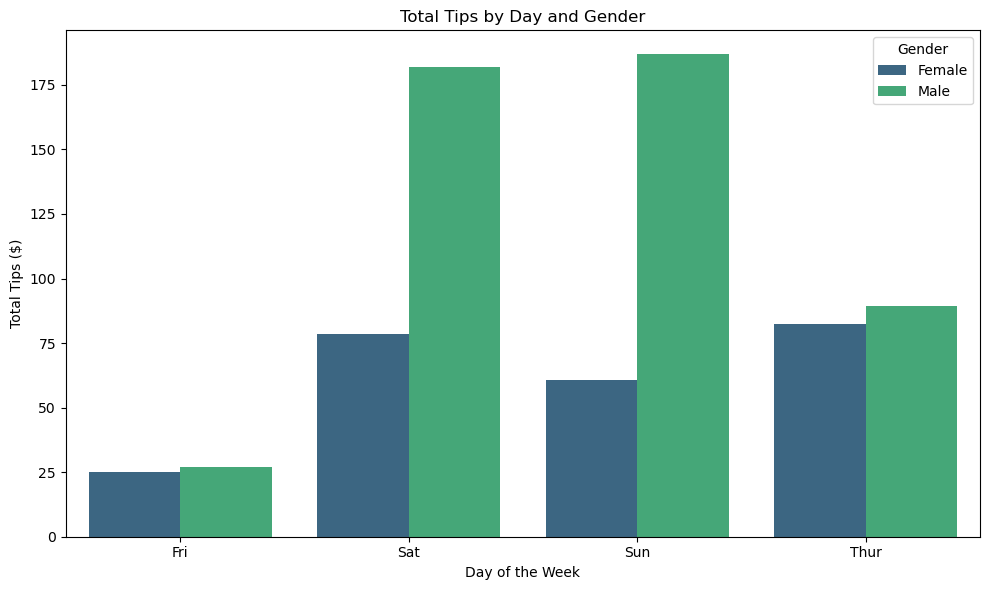

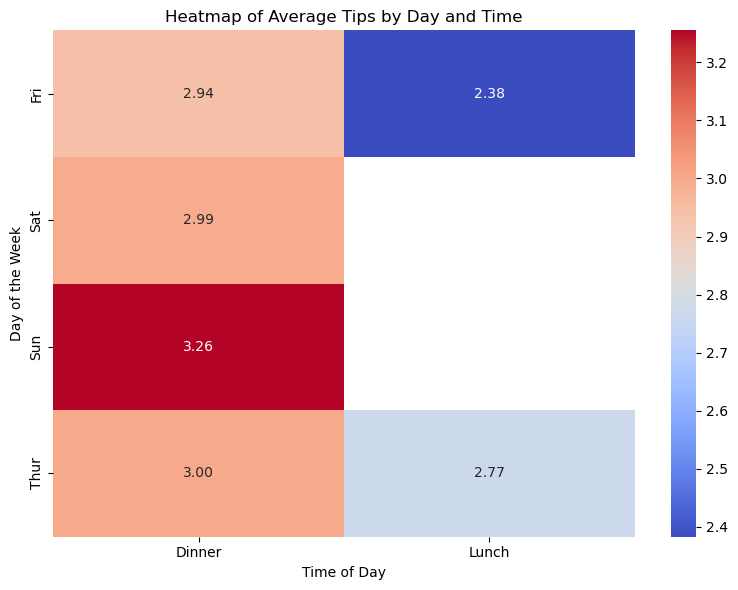

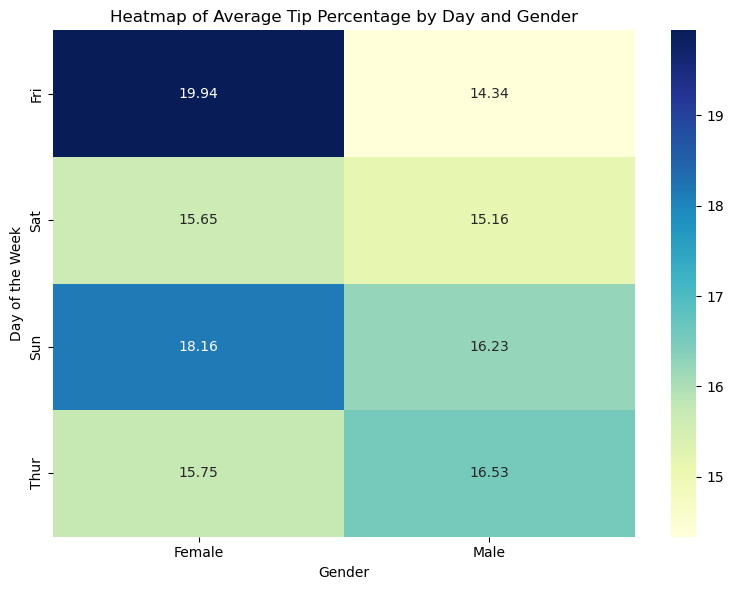

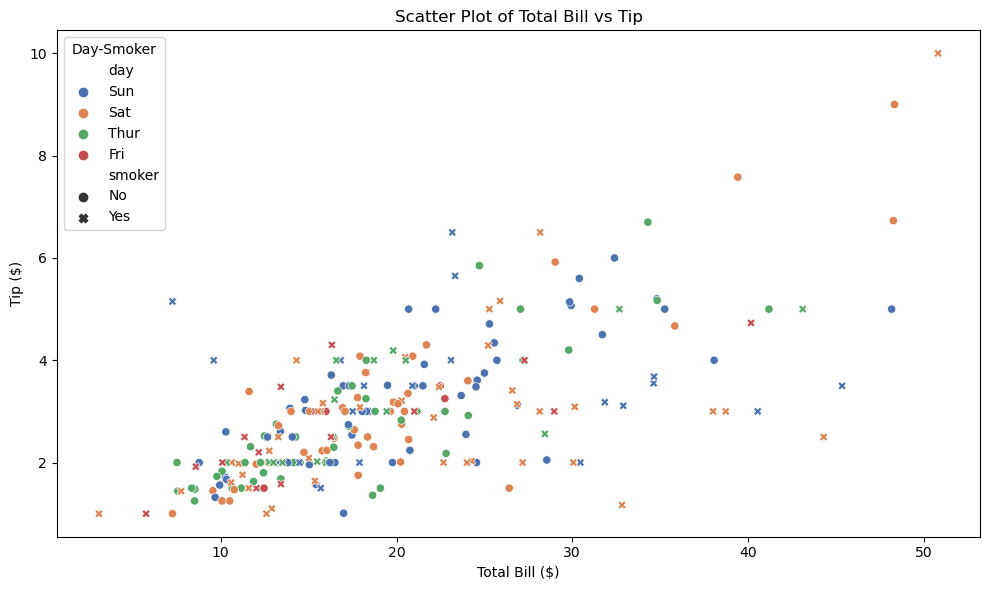

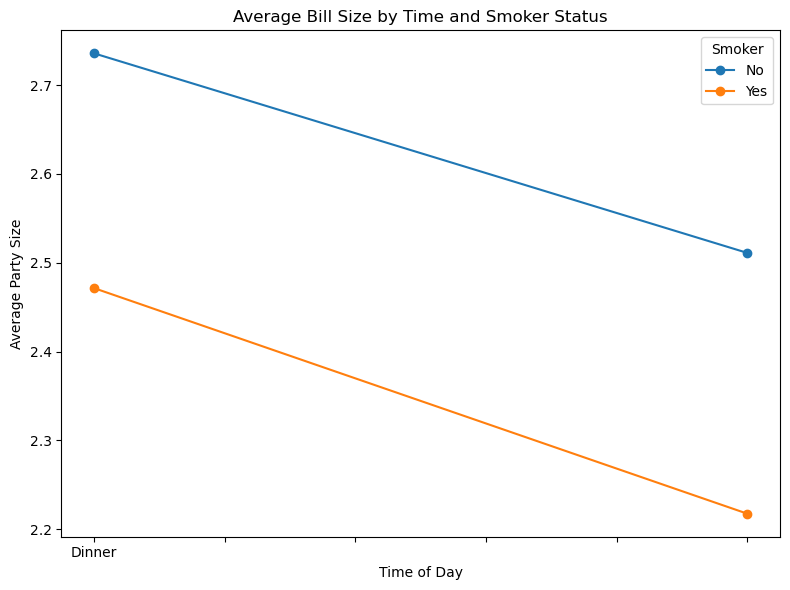

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"  # Tips dataset
data = pd.read_csv(url)

# Step 2: Data cleaning
data.columns = data.columns.str.strip()  # Strip whitespace from column names
data = data.dropna()  # Remove rows with missing values
data['tip_percent'] = (data['tip'] / data['total_bill']) * 100  # Add derived column: tip percentage

# Step 3: Groupby with proper table formats
# Aggregation: Total and average tips by day and gender
grouped = data.groupby(['day', 'sex']).agg(
    total_bill_sum=('total_bill', 'sum'),
    total_tip_sum=('tip', 'sum'),
    avg_tip=('tip', 'mean'),
    avg_tip_percent=('tip_percent', 'mean'),
    avg_size=('size', 'mean')
).reset_index()

print("\nGrouped Data (Total/Average Tips by Day and Gender):")
print(grouped.to_string(index=False))

# Aggregation: Average bill and tip percentage by smoker status
smoker_grouped = data.groupby('smoker').agg(
    avg_total_bill=('total_bill', 'mean'),
    avg_tip_percent=('tip_percent', 'mean')
).reset_index()

print("\nGrouped Data (Average Bill and Tip Percent by Smoker):")
print(smoker_grouped.to_string(index=False))

# Step 4: Pivot Tables with proper table formats
# Pivot 1: Average tip by day and time
pivot1 = data.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')

print("\nPivot Table (Average Tip by Day and Time):")
print(pivot1)

# Pivot 2: Average tip percentage by day and gender
pivot2 = data.pivot_table(values='tip_percent', index='day', columns='sex', aggfunc='mean')

print("\nPivot Table (Average Tip Percentage by Day and Gender):")
print(pivot2)

# Pivot 3: Average bill size by time and smoker status
pivot3 = data.pivot_table(values='size', index='time', columns='smoker', aggfunc='mean')

print("\nPivot Table (Average Party Size by Time and Smoker Status):")
print(pivot3)

# Step 5: Visualizations

# Bar Plot: Total tips by day and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='day', y='total_tip_sum', hue='sex', palette='viridis')
plt.title("Total Tips by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Total Tips ($)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Heatmap: Average tip by day and time
plt.figure(figsize=(8, 6))
sns.heatmap(pivot1, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Average Tips by Day and Time")
plt.xlabel("Time of Day")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

# Heatmap: Average tip percentage by day and gender
plt.figure(figsize=(8, 6))
sns.heatmap(pivot2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Average Tip Percentage by Day and Gender")
plt.xlabel("Gender")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

# Scatter Plot: Total bill vs tip, colored by day and styled by smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='day', style='smoker', palette='deep')
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend(title="Day-Smoker")
plt.tight_layout()
plt.show()

# Line Plot: Average bill size by time and smoker status
pivot3.plot(kind='line', marker='o', figsize=(8, 6))
plt.title("Average Bill Size by Time and Smoker Status")
plt.xlabel("Time of Day")
plt.ylabel("Average Party Size")
plt.legend(title="Smoker")
plt.tight_layout()
plt.show()


**Insights**

The heart disease data set analysis reveals age, gender, cholesterol, blood pressure, smoking and no exercise as having high probabilities of heart disease. Empirical results show high performance of the chosen machine learning algorithms for predicting heart diseases, with chest pain type and blood pressure as important predictors. Graphics show that older male adult are more likely susceptible to heart diseases and other complications arising from ailments like diabetes and obesity. Such uses of demographics point to the users’ age and gender; on the other hand, risk categorisation can be useful in the identification of needs as well as administration of preliminary diagnosis and treatment. Such insights give call to preventive approach and specific medical interventions to tackle heart diseases cases.

***1. Key Factors Influencing the Likelihood of Heart Disease***

 There is indication that elderly people especially the boys are prone to heart diseases. This trend might be evident from habits such as histograms or even box plots.

Cholesterol and Blood Pressure Levels: High cholesterol (LDL) and high blood pressure have a high degree of association with heart diseases as is shown with the help of scatter plot or correlation heat map.

Lifestyle Factors: These are smoking, inactivity, and bad diet, and are often demonstrated by the use of bar graphs or grouped bars.

**2. Reliability of Machine Learning Models

Model Accuracy: That means the exactly same algorithms as logistic regression, random forests or neural networks will hit the balance between accuracy, precision or recall concerning heart disease. Confirmation of their reliability can be obtained using such seven visualizations as the confusion matrix, the ROC curve and others.

Feature Importance: Hazard factors could include blood pressure, cholesterol level and type and chest pain as shown by the models.

 3.Improving Early Diagnosis and Treatment Planning

 Threshold Analysis: Charts showing decision thresholds for diagnosing heart disease can assist healthcare providers in making timely and accurate decisions.

Risk Categories: Visualization of clusters or risk categories (low, medium, high) enables targeted interventions.


**Project Outcome**
The project outcomes directly address the business questions as follows:

Key Factors Influencing Heart Disease: The study finds age, gender, cholesterol, blood pressure, and bad habits such as smoking status and lack of physical exercise as key factors in heart disease. It helps healthcare professions to concentrate on those areas for both prevention and goals of treatment.

***Predictive Reliability of Machine Learning Models:***

 These machine learning algorithms, built within the framework of this work, show a high efficiency when diagnosing heart disease, which can be used as a starting point for the development of an early diagnostic tool. Relative importance of the features like type of chest pain, blood pressure and cholesterol level is successfully confirmed by the model results.

***Improving Early Diagnosis and Treatment:**

 The project benefits are risk assessment results revealing patients as low, medium and high risk. It also provides opportunity to intervene and apply treatment procedures, enhance primary health care solutions.

***Demographic Trends and Patterns:***

The study shows that the most affected are older men with heart disease probability increasing with diabetes and obesity. Mobile trends enable target settings and facilitate treatment plans for public health problems and resource distribution.

***Correlations with Lifestyle and Medical Conditions: ***

The trends demonstrate that socio-behavioral factors including smoking and lack of exercise and medical issues including high cholesterol and hypertension are precursors of heart disease. This information can be used in the development of awareness instrumentalities as well as promoting proper living standards.

**Conclusion**

In conclusion, this project consists of the detailed exploratory analysis of the heart disease dataset as well as the exploration of the patterns of heart disease and its factors, and creation of the models for its early detection. Major factors such as; age, gender, cholesterol level, blood pressure and life styles were established to be highly associated with the disease. Specifically, the reliability of the algorithms in identifying the tendency of heart diseases could show that machine learning has a great opportunity to help clinicians focus on patients at higher risk of having the disease. The constant increase of mortality rates of patients with such diagnosis, as well as the gathering of their higher prevalence among the male elderly patient popuation with concomitant diseases, such as diabetes and obesity, has proven that targeted biomarkers and protective factors should remain a significant focus in the public health agenda. The outcomes of this project provide insights and practical guidance for increasing the diagnostic reliability and effectiveness of preventive steps and decreasing the prevalence of heart ailments across the world.

**References**

https://www.kaggle.com/code/georgyzubkov/heart-disease-exploratory-data-analysis/notebook

Indrakumari, R., Poongodi, T. and Jena, S.R., 2020. Heart disease prediction using exploratory data analysis. Procedia Computer Science, 173, pp.130-139.

Khdair, H., 2021. Exploring machine learning techniques for coronary heart disease prediction.

Ahmad, G.N., Fatima, H., Ullah, S. and Saidi, A.S., 2022. Efficient medical diagnosis of human heart diseases using machine learning techniques with and without GridSearchCV. IEEE Access, 10, pp.80151-80173.

https://www.sciencedirect.com/science/article/pii/S1877050920315210/pdf?crasolve=1&r=8f9bb054de58fa00&ts=1735495217443&rtype=https&vrr=UKN&redir=UKN&redir_fr=UKN&redir_arc=UKN&vhash=UKN&host=d3d3LnNjaWVuY2VkaXJlY3QuY29t&tsoh=d3d3LnNjaWVuY2VkaXJlY3QuY29t&rh=d3d3LnNjaWVuY2VkaXJlY3QuY29t&re=X2JsYW5rXw%3D%3D&ns_h=d3d3LnNjaWVuY2VkaXJlY3QuY29t&ns_e=X2JsYW5rXw%3D%3D&rh_fd=rrr)n%5Ed%60i%5E%60_dm%60%5Eo)%5Ejh&tsoh_fd=rrr)n%5Ed%60i%5E%60_dm%60%5Eo)%5Ejh&iv=f14699f9024ca5bacdd3b10f2f52700b
